In [2]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

In [3]:
PATH = '../downloads/runs/2023-10-19/yolo_v1_model.pt'
DATASET_PATH = '../downloads/TACO/data'
anns_file_path = DATASET_PATH + '/' + 'annotations.json'

In [4]:
model = torch.load(PATH, map_location=torch.device('cpu'))

c:\Users\USER\Codes\_university\Skripsi-Fauzan_Azmi_Dwicahyo\.venv\lib\site-packages\torch\serialization.py:799: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [5]:
from model import numel

print('Number of parameters: %d' % numel(model))

Number of parameters: 267902427


In [6]:
IMAGE_SIZE = 448

transforms = A.Compose(
    [
        A.LongestMaxSize(max_size=IMAGE_SIZE),
        A.PadIfNeeded(
            min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT
        ),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255,),
        ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[]),
)

In [7]:
from utils import (
    plot_image,
    cellboxes_to_boxes,
    non_max_suppression,
)
from taco_dataset import CoCoDatasetForYOLO

dataset = CoCoDatasetForYOLO(
    root=DATASET_PATH,
    annFile=anns_file_path,
    transform=transforms,
    C=1
)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [29]:
idx = 240
data = dataset[idx]

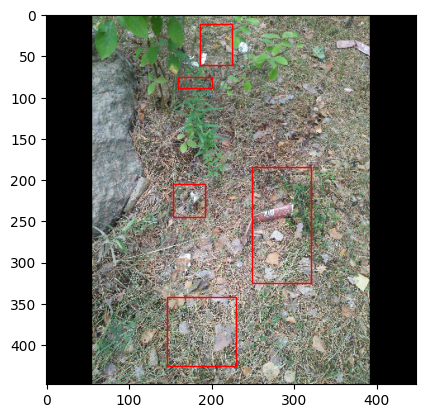

In [30]:
import torchvision.transforms as transforms
pred = model(data[0].unsqueeze(0))
pred = cellboxes_to_boxes(pred, S=7, B=2, C=1)
pred = non_max_suppression(pred[0], iou_threshold=0.5, threshold=0.4, box_format="midpoint")

transform = transforms.ToPILImage()
plot_image(transform(data[0]), pred)

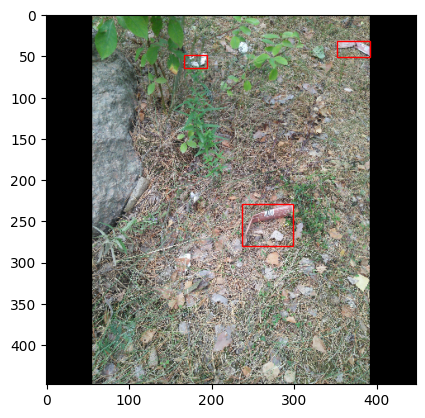

In [31]:
bboxes = cellboxes_to_boxes(torch.tensor([data[1].tolist()]), S=7, B=2, C=1)
bboxes = non_max_suppression(bboxes[0], iou_threshold=0.5, threshold=0.4, box_format="midpoint")

transform = transforms.ToPILImage()
plot_image(transform(data[0]), bboxes)